In [1]:
#import the necessary libraries(data manipulation, visualization, financial analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as ta
import pynance as pn

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

In [2]:
# Load GOOG data from the yfinance_data directory
df = pd.read_csv("../yfinance_data/MSFT.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

ticker = 'MSFT'
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = df[col].astype(float)

first_row = pd.DataFrame({
    'Open': [df['Open'].iloc[0]], 
    'High': [df['High'].iloc[0]], 
    'Low': [df['Low'].iloc[0]], 
    'Close': [df['Close'].iloc[0]], 
    'Volume': [df['Volume'].iloc[0]],
    'Ticker': [ticker]  # ticker in first row
}, index=[df.index[0]])

df['Ticker'] = None

df = pd.concat([first_row, df.iloc[1:]])

print(df.head())

                 Open       High        Low      Close      Volume Ticker
2009-01-02  14.287715  14.924187  14.170662  14.872976  50084000.0   MSFT
2009-01-05  14.777866  15.121707  14.675444  15.011971  61475200.0   None
2009-01-06  15.180236  15.363130  15.077815  15.187551  58083400.0   None
2009-01-07  14.770560  14.843718  14.251139  14.273087  72709900.0   None
2009-01-08  14.360876  14.770561  14.302350  14.719351  70255400.0   None


In [3]:
# Clean column names if they are MultiIndex

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  
print("Cleaned columns:", df.columns.tolist())
df["Ticker"] = ticker

df_numeric_index = df[df.index != 'Ticker'].copy()
df_numeric_index.index = pd.to_datetime(df_numeric_index.index)
df_numeric_index = df_numeric_index.sort_index()

print(df_numeric_index.head())

Cleaned columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']
                 Open       High        Low      Close      Volume Ticker
2009-01-02  14.287715  14.924187  14.170662  14.872976  50084000.0   MSFT
2009-01-05  14.777866  15.121707  14.675444  15.011971  61475200.0   MSFT
2009-01-06  15.180236  15.363130  15.077815  15.187551  58083400.0   MSFT
2009-01-07  14.770560  14.843718  14.251139  14.273087  72709900.0   MSFT
2009-01-08  14.360876  14.770561  14.302350  14.719351  70255400.0   MSFT


In [4]:
# Basic Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())  
df.dropna(inplace=True)  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Close   3774 non-null   float64
 4   Volume  3774 non-null   float64
 5   Ticker  3774 non-null   object 
dtypes: float64(5), object(1)
memory usage: 206.4+ KB
None
              Open         High          Low        Close        Volume
count  3774.000000  3774.000000  3774.000000  3774.000000  3.774000e+03
mean    102.420838   103.440768   101.374441   102.458692  3.895754e+07
std     100.496751   101.527406    99.431276   100.530006  2.245626e+07
min      11.196224    11.505594    10.953148    11.159394  7.425600e+06
25%      23.721387    23.914675    23.498127    23.723560  2.398462e+07
50%      48.893490    49.195981    48.606149    48.971560  3.279110e+07
75%     166.00208

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_36500\865138158.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


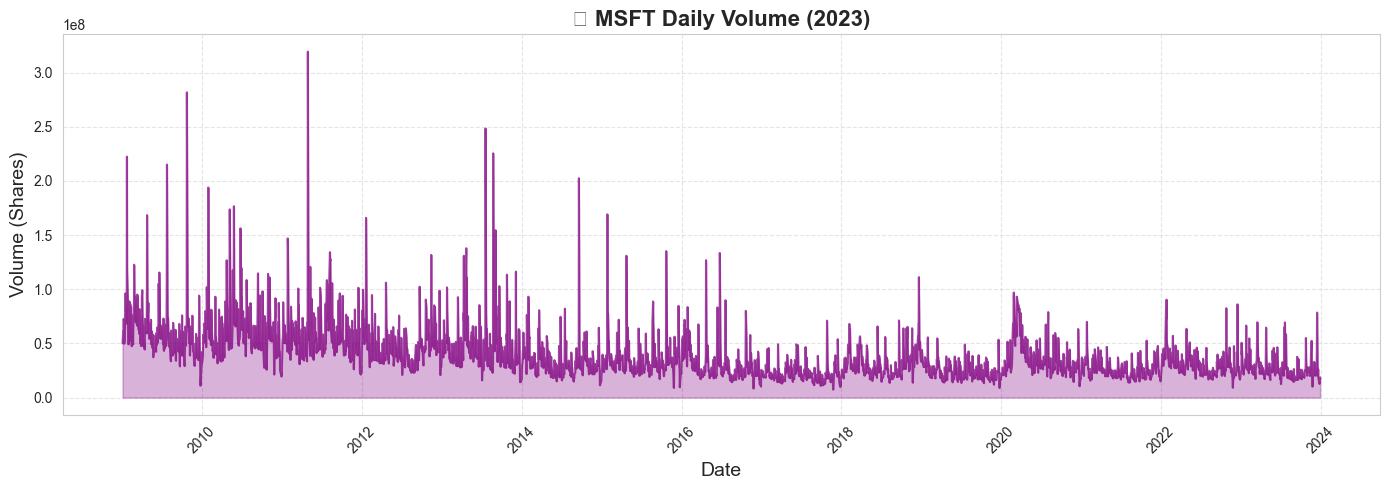

In [5]:
plt.figure(figsize=(14,5))
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df.dropna(subset=['Volume'], inplace=True) 
plt.fill_between(df.index, df['Volume'], color="purple", alpha=0.3)
plt.plot(df.index, df['Volume'], color="purple", alpha=0.7)
plt.title("📊 MSFT Daily Volume (2023)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume (Shares)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

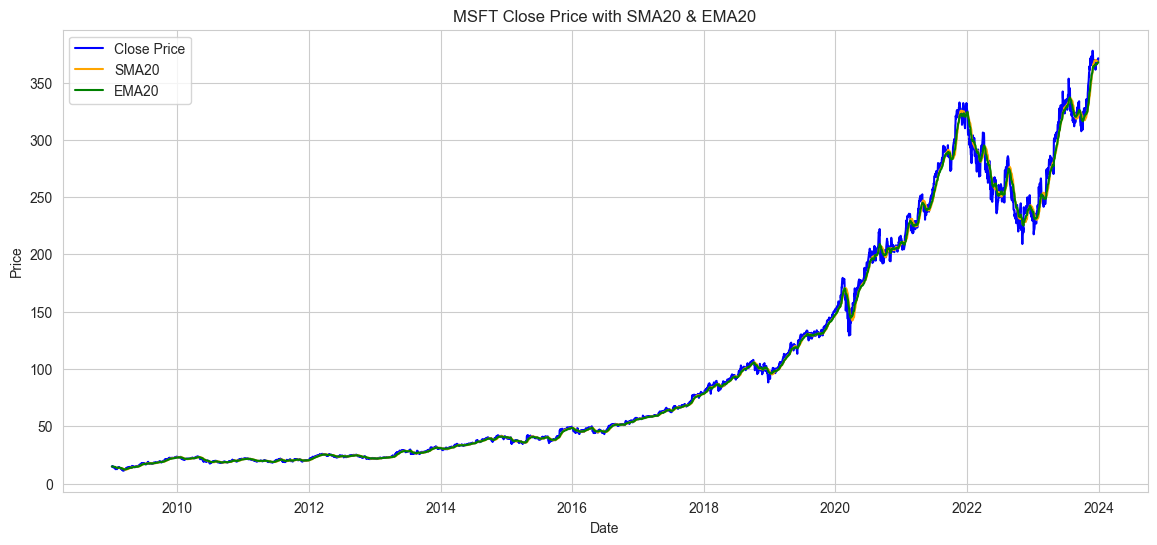

In [6]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True) 
df['SMA20'] = df['Close'].rolling(window=20).mean()

df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
 
 # SMA and EMA Plot 
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA20'], label='SMA20', color='orange')
plt.plot(df['EMA20'], label='EMA20', color='green')
plt.title('MSFT Close Price with SMA20 & EMA20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


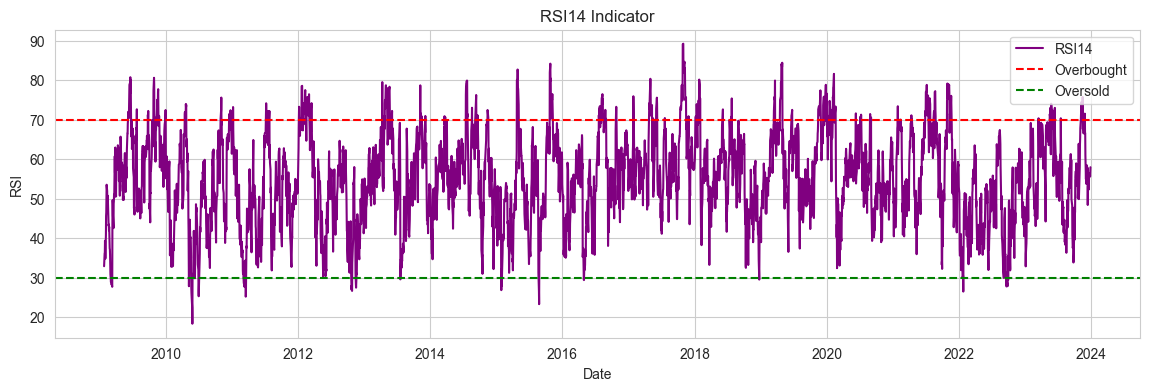

In [7]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)
df['RSI14'] = ta.RSI(df['Close'], timeperiod=14)

#RSI Indicator Plot
plt.figure(figsize=(14,4))
plt.plot(df['RSI14'], label='RSI14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI14 Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [ ]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(
    df['Close'],
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

# MACD indicator plot
plt.figure(figsize=(14,4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='gray')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()
